<a href="https://colab.research.google.com/github/calmrocks/master-machine-learning-engineer/blob/main/BasicModels/TimeSeriesDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting with LSTM
This notebook demonstrates how to perform time series forecasting using LSTM neural networks. We'll use the Bitcoin price dataset from Yahoo Finance.

## Import Libraries
We'll import the necessary libraries for data manipulation, visualization, and deep learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

## Data Loading and Exploration
We'll download Bitcoin historical data using yfinance and prepare it for analysis.

[*********************100%***********************]  1 of 1 completed


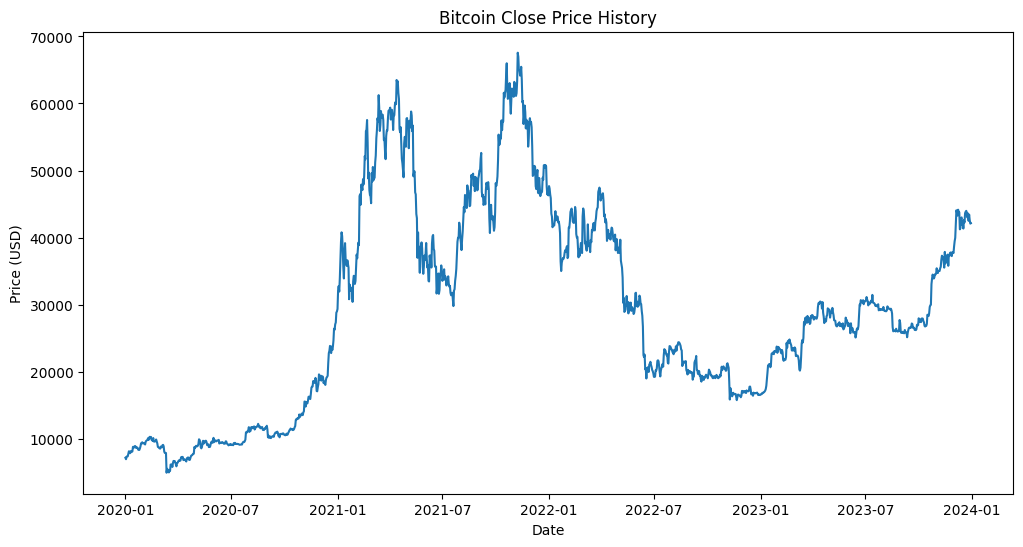

Dataset shape: (1460, 1)

First few rows:
Price             Close
Ticker          BTC-USD
Date                   
2020-01-01  7200.174316
2020-01-02  6985.470215
2020-01-03  7344.884277
2020-01-04  7410.656738
2020-01-05  7411.317383


In [3]:
# Download Bitcoin data
df = yf.download('BTC-USD', start='2020-01-01', end='2023-12-31')
# We'll use the 'Close' price for our analysis
data = df[['Close']].copy()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'])
plt.title('Bitcoin Close Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

print("Dataset shape:", data.shape)
print("\nFirst few rows:")
print(data.head())

## Data Preprocessing
We'll prepare the data for the LSTM model by:
1. Scaling the data
2. Creating sequences
3. Splitting into training and testing sets

In [4]:
# Data preprocessing function
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
seq_length = 60  # 60 days of historical data
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1120, 60, 1)
Testing set shape: (280, 60, 1)


## Model Architecture
We'll create a stacked LSTM model with dropout layers to prevent overfitting.

In [5]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training
Train the model and visualize the training progress.

In [ ]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 0.1518 - val_loss: 0.0011
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0066 - val_loss: 0.0011
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0034 - val_loss: 6.0807e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0028 - val_loss: 5.9783e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0026 - val_loss: 7.7338e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0022 - val_loss: 6.3793e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0018 - val_loss: 6.5004e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0020 - val_loss: 4.5888e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0017 - val_loss: 4.2768e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0015 - val_loss: 5.3104e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0016 - val_loss: 5.0009e-04
Epoch 12/50
28/32 ━━━━━━━━━

## Making Predictions and Evaluation
Make predictions on both training and testing sets, and evaluate the model's performance.

In [ ]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[seq_length:train_size+seq_length], y_train_inv,
         label='Actual Training', alpha=0.5)
plt.plot(data.index[seq_length:train_size+seq_length], train_predict,
         label='Predicted Training', alpha=0.5)
plt.plot(data.index[train_size+seq_length:], y_test_inv,
         label='Actual Testing', alpha=0.5)
plt.plot(data.index[train_size+seq_length:], test_predict,
         label='Predicted Testing', alpha=0.5)
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))
print(f'Train RMSE: ${train_rmse:.2f}')
print(f'Test RMSE: ${test_rmse:.2f}')

## Conclusion
This notebook demonstrated how to:
1. Load and preprocess time series data
2. Build and train an LSTM model
3. Make predictions and evaluate the model's performance

The model can be improved by:
- Tuning hyperparameters
- Adding more features
- Using different architectures
- Implementing cross-validation